In [2]:
import os
import gc
from datetime import datetime
from importlib import reload  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score #, precision_recall_curve, roc_curve, average_precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from lightgbm import LGBMClassifier


# mes modules
import kagfonct as kf

In [3]:
PATH = "./data/"
for fic in os.listdir(PATH):
    print(fic)
# print(os.listdir(path))   

application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
HomeCredit_columns_description - Copy.csv
HomeCredit_columns_description - test.csv
HomeCredit_columns_description - utf8.csv
HomeCredit_columns_description.csv
HomeCredit_columns_description.ods
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
Projet+Mise+en+prod+-+home-credit-default-risk.zip
sample_submission.csv


In [4]:
df_application_test = pd.read_csv(PATH+"application_test.csv")
df_application_train = pd.read_csv(PATH+"application_train.csv")
df_bureau = pd.read_csv(PATH+"bureau.csv")
df_bureau_balance = pd.read_csv(PATH+"bureau_balance.csv")
df_credit_card_balance = pd.read_csv(PATH+"credit_card_balance.csv")
df_payments = pd.read_csv(PATH+"installments_payments.csv")
df_pos_cash_balance = pd.read_csv(PATH+"POS_CASH_balance.csv")
df_prev_app = pd.read_csv(PATH+"previous_application.csv")
# df_homecredit = pd.read_csv(PATH+"HomeCredit_columns_description - utf8.csv")
df_homecredit = pd.read_csv(PATH+"HomeCredit_columns_description.csv", encoding = "cp1252")

NB : le fichier "HomeCredit_columns_description.csv" comporte à plusieurs reprises, un caractère qui n'est pas dans la norme utf-8 (…)

In [5]:
df_homecredit.loc[12,"Description"]

'Clients income type (businessman, working, maternity leave,…)'

# Fonctions

# Exploration

In [6]:
df_application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
df_application_train.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
294010,440623,0,Cash loans,M,N,N,0,112500.0,1012653.0,43033.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
112184,230147,0,Cash loans,F,Y,Y,0,225000.0,1575000.0,49585.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
135075,256658,0,Cash loans,F,N,Y,0,135000.0,375322.5,25519.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
293436,439957,0,Cash loans,F,N,Y,0,157500.0,611095.5,29529.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
81501,194502,0,Cash loans,F,N,Y,0,180000.0,86598.0,8563.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
300955,448659,0,Cash loans,F,N,N,1,180000.0,1080000.0,31576.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
17367,120255,0,Cash loans,M,N,N,0,225000.0,225000.0,20637.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
208595,341772,0,Cash loans,M,Y,Y,0,225000.0,531265.5,25969.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0
47784,155345,0,Cash loans,F,Y,Y,0,180000.0,422892.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
253940,393838,1,Cash loans,F,Y,N,0,76500.0,96696.0,6592.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Nombre de colonnes ayant des valeurs nulles
(df_application_train.isnull().sum()>0).sum()

67

In [9]:
df_homecredit[df_homecredit["Table"]=="application_{train|test}.csv"]

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [10]:
list(df_homecredit.loc[(df_homecredit["Table"]=="application_{train|test}.csv") & (df_homecredit["Row"]=="TARGET"), 
                       "Description"])

['Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)']

In [11]:
list(df_application_train.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [12]:
df_application_test.sample(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
19175,239314,Cash loans,M,Y,N,0,135000.0,450000.0,30073.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
19231,239825,Cash loans,M,Y,Y,0,202500.0,90000.0,7110.0,90000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
46022,436365,Cash loans,F,Y,Y,2,202500.0,675000.0,61911.0,675000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
26964,296573,Cash loans,F,N,Y,0,58500.0,72400.5,6768.0,58500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
32006,333100,Cash loans,F,N,N,0,180000.0,1096020.0,52726.5,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
18051,230939,Cash loans,F,Y,N,3,112500.0,900000.0,29034.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
31148,326385,Cash loans,F,N,Y,0,202500.0,49500.0,3294.0,49500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
44801,428188,Cash loans,M,N,N,0,135000.0,256761.0,29038.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
13503,197836,Cash loans,F,N,N,0,67500.0,312840.0,20124.0,247500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
41938,407168,Cash loans,F,N,Y,0,135000.0,397332.0,31522.5,351000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_bureau.sample(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
231354,230475,5846347,Closed,currency 1,-2450,0,-2237.0,-2266.0,6435.0,0,34472.16,0.0,0.0,0.0,Consumer credit,-2266,NaN
1016475,388493,5134408,Closed,currency 1,-1644,0,-1278.0,-1255.0,NaN,0,84060.00,0.0,0.0,0.0,Consumer credit,-762,NaN
296751,266359,6580649,Active,currency 1,-229,0,696.0,NaN,NaN,0,112500.00,0.0,0.0,0.0,Credit card,-143,0.0
1597019,384626,5331054,Closed,currency 1,-712,0,-345.0,-345.0,0.0,0,94500.00,0.0,0.0,0.0,Consumer credit,-339,NaN
392608,147890,6319877,Closed,currency 1,-616,0,-497.0,-471.0,NaN,0,72666.00,NaN,NaN,0.0,Consumer credit,-465,NaN
187150,235042,5784923,Closed,currency 1,-822,0,-644.0,-617.0,NaN,0,36040.50,NaN,NaN,0.0,Consumer credit,-611,NaN
1684900,236670,5571933,Closed,currency 1,-2211,0,NaN,-1456.0,NaN,0,0.00,0.0,0.0,0.0,Another type of loan,-1456,NaN
1132828,379209,5517607,Active,currency 1,-843,0,252.0,NaN,NaN,0,478809.00,143838.0,0.0,0.0,Consumer credit,-6,NaN
1457425,376845,6611473,Closed,currency 1,-678,0,12679.0,-647.0,NaN,0,769500.00,0.0,0.0,0.0,Credit card,-380,0.0
1226209,240367,5621878,Closed,currency 1,-872,0,-162.0,-162.0,NaN,0,1733526.00,0.0,0.0,0.0,Consumer credit,-135,NaN


In [14]:
# Nombre de colonnes ayant des valeurs nulles
(df_bureau.isnull().sum()>0).sum()

7

In [15]:
df_bureau[df_bureau["SK_ID_CURR"]==368092]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
514934,368092,6457783,Closed,currency 1,-487,0,-122.0,-121.0,NaN,0,114750.0,0.0,0.0,0.0,Consumer credit,-116,0.0
514935,368092,6457784,Closed,currency 1,-1676,0,-580.0,-1505.0,NaN,0,270000.0,0.0,0.0,0.0,Consumer credit,-1423,5044.5
514936,368092,6457785,Closed,currency 1,-1676,0,-580.0,-610.0,NaN,0,270000.0,0.0,0.0,0.0,Consumer credit,-339,0.0
514937,368092,6457786,Closed,currency 1,-1819,0,-1547.0,-1197.0,NaN,0,83385.0,NaN,NaN,0.0,Consumer credit,-1194,0.0


In [16]:
df_bureau_balance[df_bureau_balance["SK_ID_BUREAU"]== 6457783]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
10396161,6457783,0,C
10396162,6457783,-1,C
10396163,6457783,-2,C
10396164,6457783,-3,C
10396165,6457783,-4,C
10396166,6457783,-5,0
10396167,6457783,-6,0
10396168,6457783,-7,0
10396169,6457783,-8,X
10396170,6457783,-9,0


In [17]:
df_bureau_balance["STATUS"].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [18]:
# Nombre de colonnes ayant des valeurs nulles
(df_bureau_balance.isnull().sum()>0).sum()

0

In [19]:
df_homecredit[df_homecredit["Table"]=="bureau_balance.csv"]

,Unnamed: 0,Table,Row,Description,Special
139,142,bureau_balance.csv,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
140,143,bureau_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
141,144,bureau_balance.csv,STATUS,Status of Credit Bureau loan during the month ...,NaN


In [20]:
df_pos_cash_balance[df_pos_cash_balance["SK_ID_CURR"]==368092].sort_values(by="MONTHS_BALANCE")

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
9535021,2198792,368092,-82,12.0,12.0,Active,0,0
948279,2198792,368092,-81,12.0,11.0,Active,0,0
9001077,2198792,368092,-80,12.0,10.0,Active,0,0
6410934,2198792,368092,-79,12.0,9.0,Active,0,0
4157178,2198792,368092,-78,12.0,8.0,Active,0,0
4097603,2198792,368092,-77,12.0,7.0,Active,0,0
1377294,2198792,368092,-76,12.0,6.0,Active,0,0
2462432,2198792,368092,-75,12.0,5.0,Active,0,0
3171983,2198792,368092,-74,12.0,4.0,Active,0,0
3216998,2198792,368092,-73,12.0,3.0,Active,0,0


In [21]:
# Nombre de colonnes ayant des valeurs nulles
(df_pos_cash_balance.isnull().sum()>0).sum()

2

In [22]:
df_homecredit[df_homecredit["Table"]=="POS_CASH_balance.csv"]

,Unnamed: 0,Table,Row,Description,Special
142,145,POS_CASH_balance.csv,SK_ID_PREV,ID of previous credit in Home Credit related t...,NaN
143,146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,NaN
144,147,POS_CASH_balance.csv,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
145,148,POS_CASH_balance.csv,CNT_INSTALMENT,Term of previous credit (can change over time),NaN
146,149,POS_CASH_balance.csv,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,NaN
147,150,POS_CASH_balance.csv,NAME_CONTRACT_STATUS,Contract status during the month,NaN
148,151,POS_CASH_balance.csv,SK_DPD,DPD (days past due) during the month of previo...,NaN
149,152,POS_CASH_balance.csv,SK_DPD_DEF,DPD during the month with tolerance (debts wit...,NaN


In [23]:
df_credit_card_balance.sample(10)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2008323,2525900,390383,-33,0.000,0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,11.0,Active,0,0
1236607,1244631,135057,-34,191.700,135000,0.0,0.0,0.0,0.0,6750.0,...,0.000,0.000,0.0,0,0.0,0.0,63.0,Active,0,0
1388456,2415738,300910,-11,0.000,157500,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3128109,1078147,274794,-29,188672.805,180000,13500.0,13500.0,0.0,0.0,10800.0,...,188672.805,188672.805,2.0,2,0.0,0.0,77.0,Active,0,0
558342,1561303,413334,-63,125301.150,135000,0.0,0.0,0.0,0.0,6750.0,...,124633.125,124633.125,0.0,0,0.0,0.0,15.0,Active,0,0
3832856,1262965,189275,-18,143538.975,180000,0.0,0.0,0.0,0.0,9000.0,...,143538.975,143538.975,0.0,0,0.0,0.0,53.0,Active,1,1
2205619,2820737,262959,-10,0.000,450000,0.0,0.0,0.0,0.0,2250.0,...,0.000,0.000,0.0,0,0.0,0.0,13.0,Active,0,0
919176,1817560,223226,-18,0.000,180000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,47.0,Active,0,0
3422342,2079350,168545,-53,29964.960,67500,0.0,0.0,0.0,0.0,3375.0,...,29964.960,29964.960,0.0,0,0.0,0.0,34.0,Active,0,0
2153267,1316345,182675,-69,131904.540,135000,0.0,0.0,0.0,0.0,6750.0,...,131904.540,131904.540,0.0,0,0.0,0.0,6.0,Active,0,0


In [24]:
# Nombre de colonnes ayant des valeurs nulles
(df_credit_card_balance.isnull().sum()>0).sum()

9

In [25]:
df_prev_app.sample(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
410486,1061631,307154,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,12,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1417513,1780279,451270,Consumer loans,5904.090,54765.0,59265.0,0.0,54765.0,THURSDAY,8,...,Consumer electronics,12.0,low_normal,POS household with interest,365243.0,-293.0,37.0,365243.0,365243.0,1.0
1190567,1241976,111641,Cash loans,22264.740,337500.0,399870.0,NaN,337500.0,THURSDAY,7,...,XNA,48.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN
639482,2522069,431858,Cash loans,29526.795,675000.0,744498.0,NaN,675000.0,FRIDAY,15,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-724.0,326.0,-484.0,-479.0,1.0
134041,2741824,453559,Consumer loans,9363.240,88857.0,87763.5,9000.0,88857.0,SATURDAY,13,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-1807.0,-1477.0,-1477.0,-1473.0,0.0
170005,2747618,285177,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,16,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
910183,2599936,416693,Consumer loans,7110.810,65695.5,64003.5,6570.0,65695.5,TUESDAY,13,...,Consumer electronics,10.0,low_normal,POS household without interest,365243.0,-2531.0,-2261.0,-2261.0,-2252.0,1.0
1168218,1375846,385648,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1297452,1571046,424854,Consumer loans,6424.695,35010.0,31509.0,3501.0,35010.0,WEDNESDAY,16,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-1028.0,-878.0,-878.0,-872.0,0.0
526029,1448554,185685,Revolving loans,4500.000,0.0,90000.0,NaN,NaN,THURSDAY,16,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0


In [26]:
# Nombre de colonnes ayant des valeurs nulles
(df_prev_app.isnull().sum()>0).sum()

16

In [27]:
df_prev_app[df_prev_app["SK_ID_CURR"]==368092]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
132593,2198792,368092,Consumer loans,5921.37,122764.14,60732.0,67504.14,122764.14,MONDAY,13,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2475.0,-2145.0,-2145.0,-2136.0,1.0


In [28]:
df_payments.sample(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1130681,1289893,192183,1.0,24,-436.0,-449.0,18593.325,18593.325
10175865,1214818,350658,0.0,15,-563.0,-574.0,2250.000,2250.000
12891848,1659420,404805,1.0,7,-518.0,-519.0,3739.725,3739.725
2450618,1154350,130602,1.0,6,-210.0,-217.0,5675.940,5675.940
10408625,1132505,318233,0.0,10,-2895.0,-2922.0,4500.000,2250.000
6183218,2466006,235534,1.0,7,-1939.0,-1945.0,6609.060,6609.060
5128948,2058785,286652,0.0,33,-627.0,-627.0,964.125,964.125
1419550,2631214,163532,1.0,19,-413.0,-417.0,12044.340,12044.340
11007490,1574346,354089,1.0,9,-1053.0,-1062.0,15482.835,15482.835
1130515,1026688,162646,0.0,27,-2148.0,-2177.0,3375.000,2025.000


In [29]:
# Nombre de colonnes ayant des valeurs nulles
(df_payments.isnull().sum()>0).sum()

2

In [30]:
df_payments[df_payments["SK_ID_CURR"]==368092].sort_values(by="NUM_INSTALMENT_NUMBER")

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
8624343,2198792,368092,1.0,1,-2475.0,-2485.0,5921.37,5921.37
8085854,2198792,368092,1.0,2,-2445.0,-2447.0,5921.37,5921.37
9254042,2198792,368092,1.0,3,-2415.0,-2419.0,5921.37,5921.37
7829329,2198792,368092,1.0,4,-2385.0,-2387.0,5921.37,5921.37
9254285,2198792,368092,1.0,5,-2355.0,-2358.0,5921.37,5921.37
10778313,2198792,368092,1.0,6,-2325.0,-2344.0,5921.37,5921.37
9235293,2198792,368092,1.0,7,-2295.0,-2296.0,5921.37,5921.37
8320158,2198792,368092,1.0,8,-2265.0,-2274.0,5921.37,5921.37
11155326,2198792,368092,1.0,9,-2235.0,-2246.0,5921.37,5921.37
11034595,2198792,368092,1.0,10,-2205.0,-2204.0,5921.37,5921.37


# Feature Engineering

## Intégration des données

In [31]:
reload(kf)

<module 'kagfonct' from 'D:\\Laure\\AnacondaProjects\\20 - openclassrooms - datascientist\\10 - parcoursDS\\7 - Scoring\\modelisation\\kagfonct.py'>

In [32]:
data, y = kf.build_model_input(PATH)

Buro bal shape :  (27299925, 3)
transform to dummies
Counting buros
averaging buro bal
Read Bureau
Go to dummies
Merge with buro avg
Counting buro per SK_ID_CURR
Averaging bureau
            SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
SK_ID_CURR                                                  
100001               7.0  -735.000000                 0.0   
100002               8.0  -874.000000                 0.0   
100003               4.0 -1400.750000                 0.0   
100004               2.0  -867.000000                 0.0   
100005               3.0  -190.666667                 0.0   

            DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
SK_ID_CURR                                                                   
100001                82.428571        -825.500000                     NaN   
100002              -349.000000        -697.500000                1681.029   
100003              -544.500000       -1097.333333                   0.000   
100

Go to dummies
Compute nb of prevs per curr
Go to averages
Reading CC balance
Go to dummies
Compute average
Reading Installments
Read data
Shapes :  (307511, 122)


In [33]:
# suppression des colonnes qui sont en fait des indexes
data.drop(columns = [x for x in list(data.columns) if 'SK_ID' in x], inplace=True)

## Analyse du résultat

In [34]:
print("taille des données : ", data.shape)
print("taille des prévisions : ", y.shape)

taille des données :  (307511, 374)
taille des prévisions :  (307511,)


In [35]:
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [36]:
print(f"pourcentage de personnes ayant des difficultés de paiement : {(y==1).sum()/len(y)*100:.1f}%")

pourcentage de personnes ayant des difficultés de paiement : 8.1%


In [37]:
data.sample(10)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,cc_bal_cc_bal_status__Demand,cc_bal_cc_bal_status__Refused,cc_bal_cc_bal_status__Sent_proposal,cc_bal_cc_bal_status__Signed,inst_NUM_INSTALMENT_VERSION,inst_NUM_INSTALMENT_NUMBER,inst_DAYS_INSTALMENT,inst_DAYS_ENTRY_PAYMENT,inst_AMT_INSTALMENT,inst_AMT_PAYMENT
277331,0,1,0,1,0,72000.0,312768.0,15966.0,270000.0,0,...,NaN,NaN,NaN,NaN,1.000000,14.100000,-319.000000,-327.433333,9574.105500,7658.365500
4863,0,1,0,0,0,157500.0,107820.0,7798.5,90000.0,1,...,NaN,NaN,NaN,NaN,1.015152,8.469697,-1284.136364,-1293.848485,11109.865909,9346.577727
218972,0,1,1,0,0,630000.0,542673.0,55737.0,522000.0,0,...,0.0,0.0,0.0,0.0,1.737500,6.812500,-1577.237500,-1579.712500,26280.255938,25698.887438
261790,1,1,1,0,2,90000.0,630000.0,31500.0,630000.0,0,...,NaN,NaN,NaN,NaN,1.000000,4.227273,-1620.409091,-1636.727273,7228.112727,7018.793182
260817,0,1,0,1,0,135000.0,1762110.0,46611.0,1575000.0,0,...,NaN,NaN,NaN,NaN,1.333333,2.000000,-871.000000,-889.000000,15508.170000,15508.170000
126623,1,1,0,0,0,99000.0,270000.0,13500.0,270000.0,0,...,NaN,NaN,NaN,NaN,1.200000,3.000000,-226.000000,-246.000000,7001.514000,7001.514000
203325,0,0,1,1,0,261000.0,1575000.0,43312.5,1575000.0,0,...,NaN,NaN,NaN,NaN,1.000000,9.500000,-437.000000,-442.888889,43678.050000,43678.050000
14916,1,1,0,0,0,144000.0,427500.0,21375.0,427500.0,0,...,NaN,NaN,NaN,NaN,1.026549,7.398230,-1352.079646,-1365.256637,12886.593053,9803.397345
175853,0,1,1,1,0,157500.0,1061599.5,28003.5,927000.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182359,0,0,1,0,0,180000.0,569398.5,41562.0,486000.0,0,...,NaN,NaN,NaN,NaN,1.029412,11.029412,-427.617647,-434.705882,37630.263971,32597.458676


## Valeurs nulles

Pour le traitement des valeurs nulles, nous devons tenir compte du fait que le taux de personnes ayant des difficultés de paiement est de 8%. Il ne faut donc pas supprimer trop rapidement des valeurs qui pourraient être significatives pour ces personnes.

In [38]:
data.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIMARY                302902
RATE_INTEREST_PRIVILEGED             302902
cc_bal_AMT_PAYMENT_CURRENT           246451
cc_bal_AMT_DRAWINGS_OTHER_CURRENT    246371
cc_bal_CNT_DRAWINGS_ATM_CURRENT      246371
                                      ...  
HOUSETYPE_MODE                            0
REG_CITY_NOT_LIVE_CITY                    0
LIVE_REGION_NOT_WORK_REGION               0
REG_REGION_NOT_WORK_REGION                0
NAME_CONTRACT_TYPE                        0
Length: 374, dtype: int64

In [39]:
# Nombre de colonnes ayant des valeurs nulles
(data.isnull().sum()>0).value_counts()

True     315
False     59
dtype: int64

In [40]:
# Nombre de lignes ayant des valeurs nulles
(data.isnull().sum(axis=1)>0).value_counts()

True     307494
False        17
dtype: int64

In [41]:
# Nombre de colonnes ayant moins de 1% de valeurs nulles
((data.isnull().sum()/data.count()*100)<1).value_counts()

False    306
True      68
dtype: int64

In [42]:
data.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,cc_bal_cc_bal_status__Demand,cc_bal_cc_bal_status__Refused,cc_bal_cc_bal_status__Sent_proposal,cc_bal_cc_bal_status__Signed,inst_NUM_INSTALMENT_VERSION,inst_NUM_INSTALMENT_NUMBER,inst_DAYS_INSTALMENT,inst_DAYS_ENTRY_PAYMENT,inst_AMT_INSTALMENT,inst_AMT_PAYMENT
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,...,86905.000000,86905.000000,86905.000000,86905.000000,291643.000000,291643.000000,291643.000000,291635.000000,2.916430e+05,2.916350e+05
mean,0.095213,0.658370,0.340108,0.306327,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.277512,...,0.000106,0.000002,0.000064,0.003738,1.041501,9.764795,-909.662335,-920.961181,1.839261e+04,1.875431e+04
std,0.293509,0.474284,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.722458,...,0.008740,0.000155,0.000877,0.031882,0.602107,11.273675,598.461681,597.024650,2.333797e+04,2.510536e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2922.000000,-3071.000000,0.000000e+00,1.890000e-01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,4.555556,-1301.959806,-1311.842195,7.799513e+03,7.478370e+03
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.017241,6.045455,-795.953488,-807.581818,1.257265e+04,1.222576e+04
75%,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.111111,9.434413,-419.000000,-431.609963,2.137614e+04,2.135286e+04
max,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,6.000000,...,0.915789,0.013889,0.024390,1.000000,39.000000,138.110063,-3.000000,-3.000000,2.504590e+06,2.504590e+06


In [43]:
data.mean()

NAME_CONTRACT_TYPE                0.095213
CODE_GENDER                       0.658370
FLAG_OWN_CAR                      0.340108
FLAG_OWN_REALTY                   0.306327
CNT_CHILDREN                      0.417052
                                  ...     
inst_NUM_INSTALMENT_NUMBER        9.764795
inst_DAYS_INSTALMENT           -909.662335
inst_DAYS_ENTRY_PAYMENT        -920.961181
inst_AMT_INSTALMENT           18392.611499
inst_AMT_PAYMENT              18754.310245
Length: 374, dtype: float64

Pour les classifiers n'acceptant pas les valeurs nulles, nous les remplaceront par la moyenne.  
Ce n'est pas le cas de LGBM Classifier.

# Prévisions

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

## LGBMClassifier

In [45]:
%%time
print(f"Heure de début : {str(datetime.now())}")

clf = LGBMClassifier(n_estimators=100)
# params = {"n_estimators" : range(100, 500, 100), "learning_rate" : np.arange(0.05, 0.13, 0.01)}
params = {"learning_rate" : np.logspace(-3, 2, 6), "class_weight":[None, "balanced"]}

model_cv=GridSearchCV(clf, params, cv=5, scoring='roc_auc', verbose=10)
model_cv.fit(X_train, y_train)

Heure de début : 2020-04-10 19:57:51.139510
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] class_weight=None, learning_rate=0.001 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=None, learning_rate=0.001, score=0.717, total=   7.8s
[CV] class_weight=None, learning_rate=0.001 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV]  class_weight=None, learning_rate=0.001, score=0.719, total=   7.4s
[CV] class_weight=None, learning_rate=0.001 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.3s remaining:    0.0s


[CV]  class_weight=None, learning_rate=0.001, score=0.711, total=   7.4s
[CV] class_weight=None, learning_rate=0.001 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.8s remaining:    0.0s


[CV]  class_weight=None, learning_rate=0.001, score=0.719, total=   7.5s
[CV] class_weight=None, learning_rate=0.001 ..........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   30.4s remaining:    0.0s


[CV]  class_weight=None, learning_rate=0.001, score=0.710, total=   7.7s
[CV] class_weight=None, learning_rate=0.01 ...........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.1s remaining:    0.0s


[CV]  class_weight=None, learning_rate=0.01, score=0.738, total=   7.9s
[CV] class_weight=None, learning_rate=0.01 ...........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   46.1s remaining:    0.0s


[CV]  class_weight=None, learning_rate=0.01, score=0.738, total=   8.0s
[CV] class_weight=None, learning_rate=0.01 ...........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   54.2s remaining:    0.0s


[CV]  class_weight=None, learning_rate=0.01, score=0.732, total=   7.7s
[CV] class_weight=None, learning_rate=0.01 ...........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.0min remaining:    0.0s


[CV]  class_weight=None, learning_rate=0.01, score=0.739, total=   7.9s
[CV] class_weight=None, learning_rate=0.01 ...........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.2min remaining:    0.0s


[CV]  class_weight=None, learning_rate=0.01, score=0.732, total=   7.9s
[CV] class_weight=None, learning_rate=0.1 ............................
[CV]  class_weight=None, learning_rate=0.1, score=0.776, total=   7.0s
[CV] class_weight=None, learning_rate=0.1 ............................
[CV]  class_weight=None, learning_rate=0.1, score=0.773, total=   6.7s
[CV] class_weight=None, learning_rate=0.1 ............................
[CV]  class_weight=None, learning_rate=0.1, score=0.766, total=   7.0s
[CV] class_weight=None, learning_rate=0.1 ............................
[CV]  class_weight=None, learning_rate=0.1, score=0.773, total=   6.7s
[CV] class_weight=None, learning_rate=0.1 ............................
[CV]  class_weight=None, learning_rate=0.1, score=0.771, total=   6.8s
[CV] class_weight=None, learning_rate=1.0 ............................
[CV]  class_weight=None, learning_rate=1.0, score=0.720, total=   5.1s
[CV] class_weight=None, learning_rate=1.0 ............................
[CV] 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  6.2min finished


Wall time: 6min 18s


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, 'balanced'],
                         'learnin

In [46]:
print("best score : ", model_cv.best_score_)
print("best params_ : ", model_cv.best_params_)

best score :  0.7738448640709108
best params_ :  {'class_weight': 'balanced', 'learning_rate': 0.1}


In [47]:
%%time
clf = LGBMClassifier(n_estimators=100, learning_rate=model_cv.best_params_["learning_rate"], 
                     class_weight=model_cv.best_params_["class_weight"])
clf.fit(X_train, y_train)

Wall time: 8.76 s


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [48]:
clf.objective_

'binary'

In [49]:
ret = clf.predict_proba(X_test)
roc_auc_score(y_test, ret[:,1])

0.7776865131370082

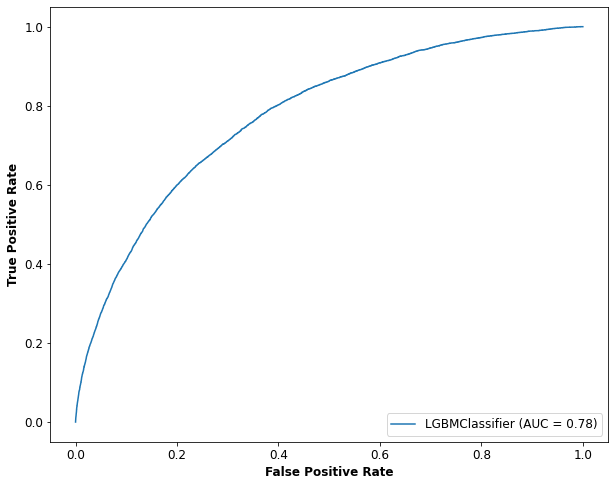

In [50]:
plt.rcParams.update({"font.size" : 12, 'axes.titleweight':"bold", 'axes.labelweight': 'bold', \
                         "figure.figsize":[10,8], "savefig.bbox":"tight"})
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [51]:
df_feature_importance = pd.DataFrame()
df_feature_importance["feature"] = data.columns
df_feature_importance["occurences"] = clf.feature_importances_
df_feature_importance

,feature,occurences
0,NAME_CONTRACT_TYPE,19
1,CODE_GENDER,35
2,FLAG_OWN_CAR,0
3,FLAG_OWN_REALTY,1
4,CNT_CHILDREN,0
...,...,...
369,inst_NUM_INSTALMENT_NUMBER,22
370,inst_DAYS_INSTALMENT,7
371,inst_DAYS_ENTRY_PAYMENT,16
372,inst_AMT_INSTALMENT,4


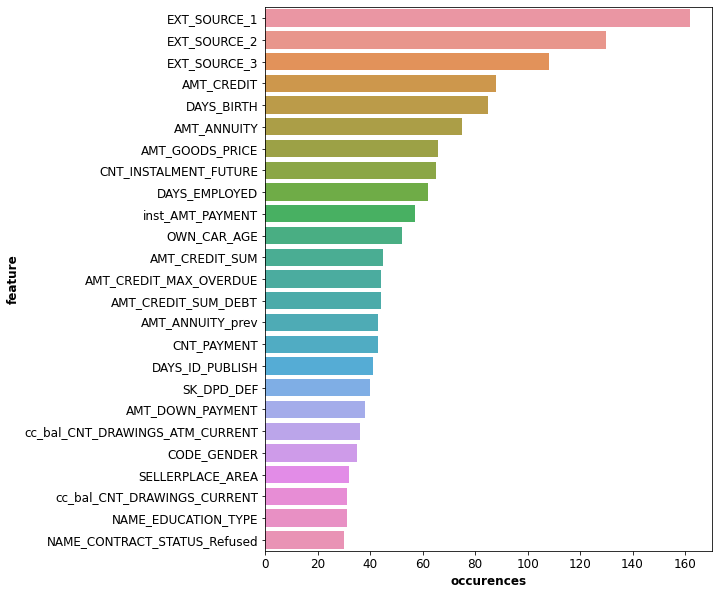

In [52]:
plt.figure(figsize=(8,10))
sns.barplot(x="occurences", y="feature", 
            data=df_feature_importance.sort_values(by="occurences", ascending=False)[:25])
plt.show()

In [53]:
df_homecredit[df_homecredit["Row"].isin(["AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"])].sort_values(by="Row")

,Unnamed: 0,Table,Row,Description,Special
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN
138,141,bureau.csv,AMT_ANNUITY,Annuity of the Credit Bureau credit,NaN
176,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
178,181,previous_application.csv,AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
10,13,application_{train|test}.csv,AMT_GOODS_PRICE,For consumer loans it is the price of the good...,NaN
180,183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN


In [54]:
df_feature_importance.sort_values(by="occurences", ascending=False)[:25]

,feature,occurences
39,EXT_SOURCE_1,162
40,EXT_SOURCE_2,130
41,EXT_SOURCE_3,108
6,AMT_CREDIT,88
15,DAYS_BIRTH,85
7,AMT_ANNUITY,75
8,AMT_GOODS_PRICE,66
329,CNT_INSTALMENT_FUTURE,65
16,DAYS_EMPLOYED,62
373,inst_AMT_PAYMENT,57


In [55]:
## TEster aussi : https://www.kaggle.com/pavanraj159/loan-repayers-v-s-loan-defaulters-home-credit/log

## Suppression des valeurs nulles

In [56]:
values = dict(data.mean())
values

{'NAME_CONTRACT_TYPE': 0.09521285417432222,
 'CODE_GENDER': 0.6583699444897906,
 'FLAG_OWN_CAR': 0.34010815873253314,
 'FLAG_OWN_REALTY': 0.30632725333402705,
 'CNT_CHILDREN': 0.4170517477423572,
 'AMT_INCOME_TOTAL': 168797.9192969845,
 'AMT_CREDIT': 599025.9997057016,
 'AMT_ANNUITY': 27108.573909183444,
 'AMT_GOODS_PRICE': 538396.2074288895,
 'NAME_TYPE_SUITE': 0.2775120239601185,
 'NAME_INCOME_TYPE': 1.0773468266175845,
 'NAME_EDUCATION_TYPE': 0.3496492808387342,
 'NAME_FAMILY_STATUS': 1.2465765452292763,
 'NAME_HOUSING_TYPE': 0.2737723203397602,
 'REGION_POPULATION_RELATIVE': 0.02086811205778947,
 'DAYS_BIRTH': -16036.995066843137,
 'DAYS_EMPLOYED': 63815.04590404896,
 'DAYS_REGISTRATION': -4986.120327538419,
 'DAYS_ID_PUBLISH': -2994.2023732484367,
 'OWN_CAR_AGE': 12.061090818687727,
 'FLAG_MOBIL': 0.9999967480838083,
 'FLAG_EMP_PHONE': 0.8198893698111612,
 'FLAG_WORK_PHONE': 0.1993684778755882,
 'FLAG_CONT_MOBILE': 0.9981334001060125,
 'FLAG_PHONE': 0.28106636835755466,
 'FLAG_EMA

In [57]:
data.fillna(value=values, inplace=True)

In [58]:
# On recalcule les jeux d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

## SGDClassifier

In [59]:
%%time
print(f"Heure de début : {str(datetime.now())}")

sgdc = SGDClassifier(loss="modified_huber")
params = {"alpha" : np.logspace(-4, 1, 6), "class_weight":[None, "balanced"]}

model_cv=GridSearchCV(sgdc, params, cv=5, verbose=10)
model_cv.fit(X_train, y_train)

Heure de début : 2020-04-10 20:04:22.208369
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] alpha=0.0001, class_weight=None .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... alpha=0.0001, class_weight=None, score=0.875, total=   3.8s
[CV] alpha=0.0001, class_weight=None .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] ..... alpha=0.0001, class_weight=None, score=0.746, total=   4.2s
[CV] alpha=0.0001, class_weight=None .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


[CV] ..... alpha=0.0001, class_weight=None, score=0.493, total=   6.1s
[CV] alpha=0.0001, class_weight=None .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.0s remaining:    0.0s


[CV] ..... alpha=0.0001, class_weight=None, score=0.848, total=   5.9s
[CV] alpha=0.0001, class_weight=None .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.0s remaining:    0.0s


[CV] ..... alpha=0.0001, class_weight=None, score=0.919, total=   7.6s
[CV] alpha=0.0001, class_weight=balanced .............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.7s remaining:    0.0s


[CV] . alpha=0.0001, class_weight=balanced, score=0.891, total=   3.3s
[CV] alpha=0.0001, class_weight=balanced .............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.0s remaining:    0.0s


[CV] . alpha=0.0001, class_weight=balanced, score=0.563, total=   4.3s
[CV] alpha=0.0001, class_weight=balanced .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   35.4s remaining:    0.0s


[CV] . alpha=0.0001, class_weight=balanced, score=0.663, total=  12.8s
[CV] alpha=0.0001, class_weight=balanced .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   48.2s remaining:    0.0s


[CV] . alpha=0.0001, class_weight=balanced, score=0.640, total=   4.1s
[CV] alpha=0.0001, class_weight=balanced .............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   52.3s remaining:    0.0s


[CV] . alpha=0.0001, class_weight=balanced, score=0.088, total=   5.5s
[CV] alpha=0.001, class_weight=None ..................................
[CV] ...... alpha=0.001, class_weight=None, score=0.919, total=   5.0s
[CV] alpha=0.001, class_weight=None ..................................
[CV] ...... alpha=0.001, class_weight=None, score=0.919, total=   5.7s
[CV] alpha=0.001, class_weight=None ..................................
[CV] ...... alpha=0.001, class_weight=None, score=0.915, total=   5.8s
[CV] alpha=0.001, class_weight=None ..................................
[CV] ...... alpha=0.001, class_weight=None, score=0.919, total=   6.7s
[CV] alpha=0.001, class_weight=None ..................................
[CV] ...... alpha=0.001, class_weight=None, score=0.918, total=   7.8s
[CV] alpha=0.001, class_weight=balanced ..............................
[CV] .. alpha=0.001, class_weight=balanced, score=0.590, total=   5.8s
[CV] alpha=0.001, class_weight=balanced ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  6.6min finished


Wall time: 6min 42s


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='modified_huber', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'class_weight': [None, 'balanced']},
             pre_dispatch='2*n_jobs', refit=Tru

In [60]:
print("best score : ", model_cv.best_score_)
print("best params_ : ", model_cv.best_params_)

best score :  0.9178622645989641
best params_ :  {'alpha': 0.001, 'class_weight': None}


In [61]:
sgdc = SGDClassifier(loss="modified_huber", alpha=model_cv.best_params_["alpha"], class_weight=model_cv.best_params_["class_weight"])
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
ret = sgdc.predict_proba(X_test)
roc_auc_score(y_test, ret[:,1])

0.5511489628701143

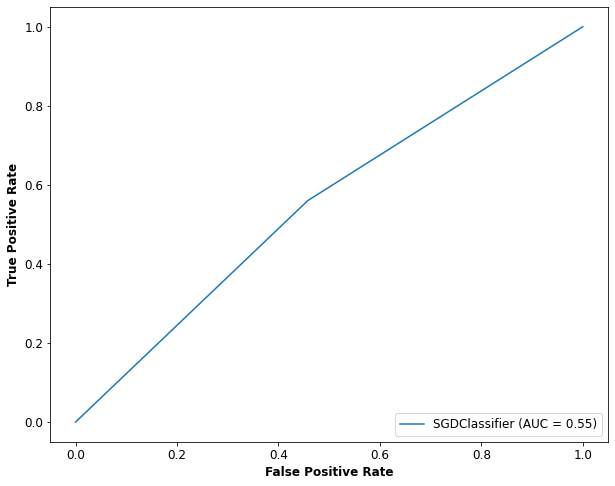

In [63]:
plot_roc_curve(sgdc, X_test, y_test)
plt.show()